# Deep Learning Case Study:  The Otto Group

For a practical case study, we are going to handle a Kaggle competition of 2015 where over 3000 teams participated in a $10.000 competiton.

_...The Otto Group is one of the world's biggest e-commerce companies, with subsidiaries in more than 20 countries. It is selling millions of products worldwide every day, with several thousand products being added to the product line. A consistent analysis of the performance of the products is crucial. However, due to the diverse global infrastructure, many identical products get classified differently. Therefore, the quality of the product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights we can generate about the product range_

More Info: https://www.kaggle.com/c/otto-group-product-classification-challenge

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
# Not displaying the warnings on the screen
import warnings
warnings.filterwarnings("ignore")

### 1. Read training data

Data fields

* **id**: an anonymous id unique to a product
* **feat_1, feat\_2, ..., feat\_93**: the various features of a product
* **target**: the class of a product

In [3]:
df_train= pd.read_csv('data/train.csv')
Y_train = df_train.values[:,-1] # last column
X_train = df_train.values[:,1:-1]
#skip the first column (=id) and the last (the model-class)

<h4>Scaling</h4>
Since we are scaling the data. The <b>StandardScaler</b> object of sklearn is going to be used. For this purpose a function <b><i>preprocess_data</i></b> is defined:

In [7]:
from sklearn.preprocessing import StandardScaler
def preprocess_data(X, scaler=None):
    """Preprocess input data by standardising the features 
    This is achieved by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

<hr>
<h4>Encoding data </h4><br>
There are 9 classes in the training set. In stead of putting the classes into a column vector with values 1,2,..9. A matrix with 9 columns is produced. A value in column $k$ means that we are dealing with an item belonging to class $k$. <br>
This is handled by the <b>LabelEncoder</b> object of sklearn

In [8]:
from sklearn.preprocessing import LabelEncoder
def preprocess_labels(labels):
    """Encode labels with values among 0 and `n-classes-1`"""
    encoder = LabelEncoder()
    encoder.fit(labels)
    y = encoder.transform(labels).astype(np.int32)
    y = to_categorical(y)
    return y, encoder

The outcome of Y_Train has the following classes 

In [9]:
# unique number of classes
np.unique(Y_train)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

#### Applying the scaling and encoding:

In [10]:
X_train,scaler = preprocess_data(X_train)
Y_train,encoder = preprocess_labels(Y_train)

Inspect the data

In [11]:
# Extract the dimentions of the input
dims = X_train.shape
print('dimensions input:', dims[0],'(observations) x',dims[1],'(features)')

# Inspect the number of classes
nb_classes = Y_train.shape[1]
print('Number of classes:',nb_classes)

dimensions input: 61878 (observations) x 93 (features)
Number of classes: 9


In [8]:
pd.DataFrame(Y_train[0:5,:]).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3> Step 2: Building the model </h3><br>

Creating a neural network with one inputlayer, one hidden layer. 

#### Loading the required modules

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#### Add layers and compile

In [16]:
model = Sequential()
model.add(Dense(nb_classes, input_shape=(dims[1],), activation='sigmoid'))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 846       
_________________________________________________________________
activation (Activation)      (None, 9)                 0         
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


<h4>Compile the network</h4>

In [17]:
# compile the model use "stochastic gradient descent" as optimizer, and as loss the "categorical cross-entropy"
model.compile(optimizer='sgd', loss='categorical_crossentropy')

### 3. Fit data to network
This fires off the backpropagation ....

In [18]:
model.fit(X_train, Y_train);

Train on 61878 samples
61878/61878 [==============================] - 2s 33us/sample - loss: 1.9831


<h4>Predict the class or the model </h4>
We calculate the traing error by applying the predicct_classes method on the training set. Only the first result is shown. It shows the column number in the Y_train matrix.

In [19]:
# Use the method "model.predict_classes" to generate a predicition for a new data point
print('Predicted class = Number', model.predict_classes(X_train)[0],'(not the class name)')

Predicted class = Number 5 (not the class name)


In [14]:
# Additional to the single prediction we can inspect the probability asign by the model to each class
print('Predicted probabilities',model.predict(X_train)[0,:])

Predicted probabilities [0.14263254 0.07978192 0.07942501 0.08939018 0.09730069 0.17381409
 0.10600227 0.13103452 0.10061874]


<hr>
The total sum of predicted probabilites is equal to 1. This comes from the property of the softmax function:

In [24]:
# Sum the probabilities for each class
sum(model.predict(X_train)[0,:])

1.0000001341104507

<h3> Step 3: Make a forecast </h3><br>

#### Reading the test data from the test.csv file:

In [25]:
df_test= pd.read_csv('data/test.csv')
print('Nbr of samples in test:',df_test.shape[0])
X_test = df_test.values[:,1:]

Nbr of samples in test: 144368


The test data has to be processed by the scaler we obtained when processing the training data:

In [26]:
X_test_scaled = scaler.transform(X_test)

Using the test data and making a prediction using the network:

In [29]:
# Get the predicted class
Y_test = model.predict_classes(X_test_scaled)
# Get the predicted probability for each class
Y_test_prob = model.predict(X_test_scaled)

In [30]:
print("Predicted class:", Y_test[0])
print("Predicted probabilities:\n", Y_test_prob[0,:])

Predicted class: 2
Predicted probabilities:
 [0.07999683 0.16720219 0.17215617 0.16699517 0.0967989  0.06871002
 0.0923199  0.08585407 0.06996679]


#### Display the result for the first 5 items
We can use the inverse_transform function of the encoder object to retrieve the class names. 

In [31]:
encoder.inverse_transform(Y_test[0:5])

array(['Class_3', 'Class_6', 'Class_6', 'Class_2', 'Class_3'],
      dtype=object)

#### Inspecting the results using matplotlib

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

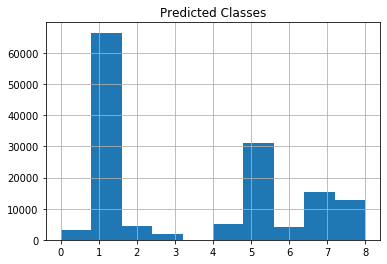

In [33]:
pd.DataFrame(Y_test,columns=['Predicted Classes']).hist();